In [122]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.config.list_physical_devices('GPU'))

Num GPUs Available:  1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [123]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [124]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yohanshanuka","key":"e2a9c78b903336207ee006ff6d6563e8"}'}

In [125]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [126]:
!pip install kaggle


In [127]:
!kaggle datasets download -d arjuntejaswi/plant-village


Dataset URL: https://www.kaggle.com/datasets/arjuntejaswi/plant-village
License(s): unknown
 99% 326M/329M [00:21<00:00, 7.14MB/s]
100% 329M/329M [00:21<00:00, 16.2MB/s]


In [128]:
!rm -rf PlantVillage
!unzip plant-village.zip


Streaming output truncated to the last 5000 lines.
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-7476153023ce___YLCV_GCREC 2258.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Cur

In [129]:
import os

os.makedirs("Tomato_Dataset", exist_ok=True)

In [130]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [131]:
import shutil

source_dir = "PlantVillage"   # change if yours is different
target_dir = "Tomato_Dataset"

for folder in os.listdir(source_dir):
    if folder.startswith("Tomato"):
        shutil.copytree(
            os.path.join(source_dir, folder),
            os.path.join(target_dir, folder),
            dirs_exist_ok=True
        )

print("Tomato dataset created in:", target_dir)

Tomato dataset created in: Tomato_Dataset


In [132]:
import shutil
import os

# Path to your tomato dataset
tomato_dir = "Tomato_Dataset"

# List of folders you want to remove
folders_to_remove = [
    "Tomato_Septoria_leaf_spot",
    "Tomato_Spider_mites_Two_spotted_spider_mite",
    "Tomato__Tomato_YellowLeaf__Curl_Virus",
    "Tomato__Tomato_mosaic_virus"
]

for folder in folders_to_remove:
    folder_path = os.path.join(tomato_dir, folder)
    if os.path.exists(folder_path):
        shutil.rmtree(folder_path)
        print(f"Removed folder: {folder_path}")
    else:
        print(f"Folder not found: {folder_path}")


Removed folder: Tomato_Dataset/Tomato_Septoria_leaf_spot
Removed folder: Tomato_Dataset/Tomato_Spider_mites_Two_spotted_spider_mite
Removed folder: Tomato_Dataset/Tomato__Tomato_YellowLeaf__Curl_Virus
Removed folder: Tomato_Dataset/Tomato__Tomato_mosaic_virus


In [133]:
import os
import shutil
import random

# Path to original dataset
original_path = 'Tomato_Dataset'  # <- Make sure this is the folder with all your class subfolders
# Path to new balanced dataset
balanced_path = 'balanced_dataset'
os.makedirs(balanced_path, exist_ok=True)

classes = os.listdir(original_path)
num_images = 500  # Number of images per class

for cls in classes:
    cls_path = os.path.join(original_path, cls)
    images = os.listdir(cls_path)

    if len(images) < num_images:
        raise ValueError(f"Class '{cls}' has only {len(images)} images. Cannot sample {num_images}.")

    # Randomly select 500 images
    selected_images = random.sample(images, num_images)

    # Create folder for class in balanced dataset
    balanced_cls_path = os.path.join(balanced_path, cls)
    os.makedirs(balanced_cls_path, exist_ok=True)

    # Copy selected images
    for img in selected_images:
        shutil.copy(os.path.join(cls_path, img), os.path.join(balanced_cls_path, img))

# --- Verification Step ---
print("\nChecking balanced dataset image counts:")
for cls in os.listdir(balanced_path):
    cls_count = len(os.listdir(os.path.join(balanced_path, cls)))
    print(f"{cls}: {cls_count} images")



Checking balanced dataset image counts:
Tomato_Leaf_Mold: 500 images
Tomato_Early_blight: 500 images
Tomato_healthy: 500 images
Tomato_Bacterial_spot: 500 images
Tomato_Late_blight: 500 images
Tomato__Target_Spot: 500 images


In [134]:
import os

tomato_dir = "/content/balanced_dataset"

for folder in os.listdir(tomato_dir):
    folder_path = os.path.join(tomato_dir, folder)
    if os.path.isdir(folder_path):
        num_images = len([f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
        print(f"{folder}: {num_images} images")


Tomato_Leaf_Mold: 500 images
Tomato_Early_blight: 500 images
Tomato_healthy: 500 images
Tomato_Bacterial_spot: 500 images
Tomato_Late_blight: 500 images
Tomato__Target_Spot: 500 images


In [135]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "balanced_dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 3000 files belonging to 6 classes.


In [136]:
class_names = dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato__Target_Spot',
 'Tomato_healthy']

In [137]:
len(dataset)

94

In [138]:
32*281

8992

In [139]:
for img_batch, lbl_batch in dataset.take(1):
  print(img_batch.shape)
  print(lbl_batch.numpy())

(32, 256, 256, 3)
[3 0 3 5 3 0 5 3 3 2 1 0 0 4 2 1 2 0 2 5 0 2 4 3 0 0 4 3 3 2 5 3]


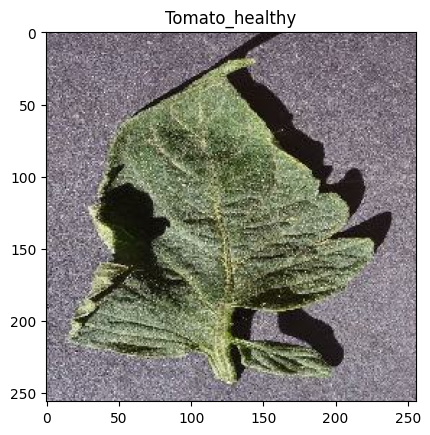

In [140]:
for img_batch, lbl_batch in dataset.take(1):
  plt.imshow(img_batch[0].numpy().astype('uint8'))
  plt.title(class_names[lbl_batch[0]])

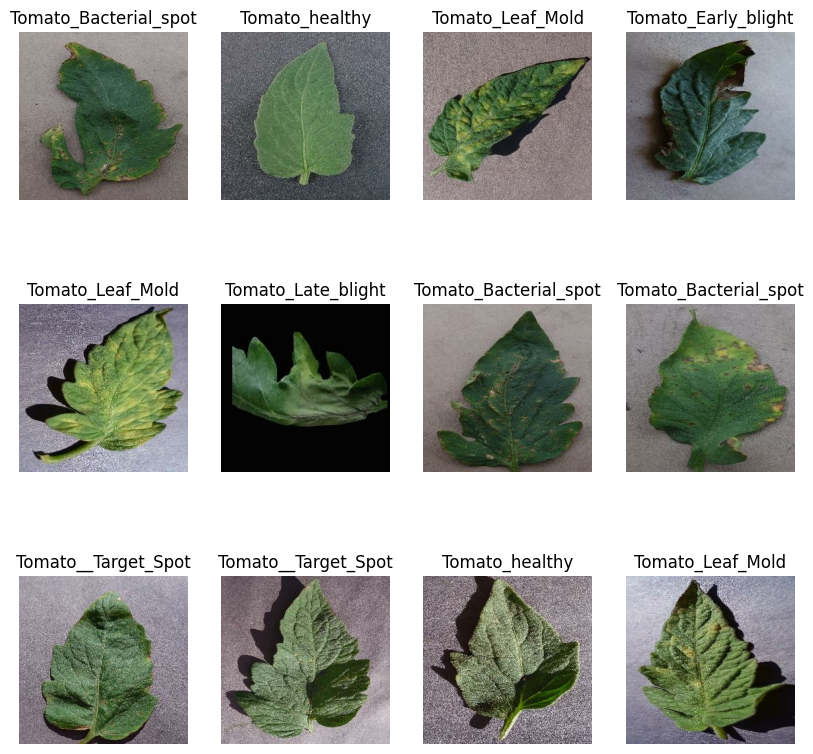

In [141]:
plt.figure(figsize = (10, 10))

for img_batch, lbl_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i+1)
    plt.imshow(img_batch[i].numpy().astype('uint8'))
    plt.title(class_names[lbl_batch[i]])
    plt.axis('off')

In [142]:
train_size = 0.8
len(dataset)*train_size

75.2

In [143]:
train_dataset = dataset.take(224)
len(train_dataset)

94

In [144]:
test_dataset = dataset.skip(224)
len(test_dataset)

0

In [145]:
validation_size = 0.1
len(dataset)*validation_size

9.4

In [146]:
validation_size = test_dataset.take(28)
len(validation_size)

0

In [147]:
test_dataset = test_dataset.skip(28)
len(test_dataset)

0

In [148]:
def get_dataset_partitions_tf(dataset, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):

  dataset_size = len(dataset)

  if shuffle:
    dataset = dataset.shuffle(shuffle_size, seed=12)

  train_size = int(train_split * dataset_size)
  val_size = int(val_split * dataset_size)

  train_dataset = dataset.take(train_size)

  validation_dataset = dataset.skip(train_size).take(val_size)
  test_dataset = dataset.skip(train_size).take(val_size)

  return train_dataset, validation_dataset, test_dataset


In [149]:
train_dataset, validation_dataset, test_dataset = get_dataset_partitions_tf(dataset)

In [150]:
len(train_dataset)

75

In [151]:
len(validation_dataset)

9

In [152]:
len(test_dataset)

9

In [153]:
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
validation_dataset = validation_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [154]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [155]:
counts = {
    "Tomato_Bacterial_spot": 2127,
    "Tomato_Late_blight": 1909,
    "Tomato_healthy": 1591,
    "Tomato__Target_Spot": 1404,
    "Tomato_Early_blight": 1000,
    "Tomato_Leaf_Mold": 952
}

total = sum(counts.values())

class_weights = {}

for idx, (cls, count) in enumerate(counts.items()):
    class_weights[idx] = total / (len(counts) * count)

class_weights


{0: 0.703886538160163,
 1: 0.784267504801816,
 2: 0.9410224177666038,
 3: 1.066358024691358,
 4: 1.4971666666666668,
 5: 1.5726540616246498}

In [156]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [157]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
no_of_classes = 6

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,

    layers.Conv2D(32, (3, 3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size = (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size = (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(no_of_classes, activation='softmax')
])

model.build(input_shape = input_shape)

In [158]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_7 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (32, 6)                │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,942 (718.52 KB)

 Trainable params: 183,942 (718.52 KB)

 Non-trainable params: 0 (0.00 B)

In [159]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [160]:
history = model.fit(
    train_dataset,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = validation_dataset
)

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 103ms/step - accuracy: 0.1746 - loss: 1.7860 - val_accuracy: 0.3056 - val_loss: 1.5954
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - accuracy: 0.4088 - loss: 1.4994 - val_accuracy: 0.5208 - val_loss: 1.2619
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.5111 - loss: 1.2852 - val_accuracy: 0.6146 - val_loss: 1.0634
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.6033 - loss: 1.0530 - val_accuracy: 0.5486 - val_loss: 1.2023
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.6499 - loss: 0.9152 - val_accuracy: 0.6562 - val_loss: 0.9172
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.7353 - loss: 0.7295 - val_accuracy: 0.6389 - val_loss: 1.0204
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.7433 - loss: 0.6821 - val_accuracy: 0.6910 - val_loss: 0.8620
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.7878 - loss: 0.5701 - val_accuracy: 0.7986 